In [83]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Aqua)
case_aqua = 'Aqua'

# path to ocean_annual file
path_year_aqua = '/skdat0/sragen/aqua/DATA/300yr/21000101.ocean_annual.nc'
dy_aqua = xr.open_dataset(path_year_aqua, decode_times=True)


# Case name (Straight coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/800yr/26000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)


# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/800yr/26000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)


# Case name (Wide Straight)
case_wide = 'Wide Straight'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/200yr/20000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)


# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)


# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [110]:
def make_case_images(dy_case):
    x = 100
    b = np.linspace(-x, x, 11, endpoint=True)
    
    tos = (dy_case['tos'].isel(time=0) * 0) - 150
    tos = np.nan_to_num(tos) + 70
    lon = dy_case['xh']
    
    tos, lon = add_cyclic_point(tos, coord=lon)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=230))
    plt.contourf(lon, dy_case['yh'], tos, 
                 b, cmap='gist_earth', transform=ccrs.PlateCarree())
    ax.gridlines()
#     plt.colorbar(ticks=b)
    # plt.savefig(fig_path+'SST.png')
    plt.show()

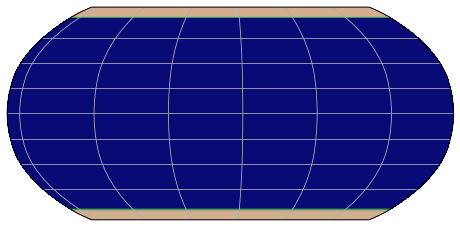

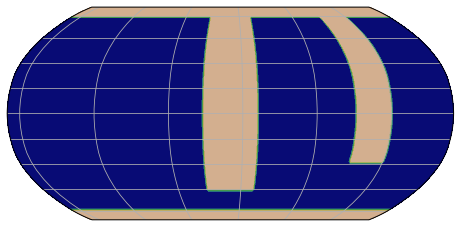

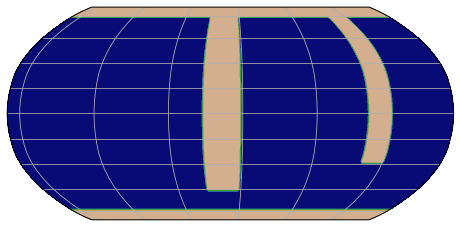

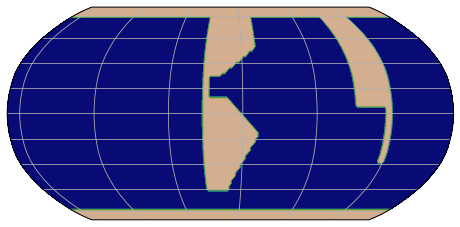

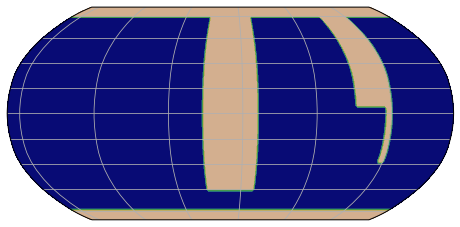

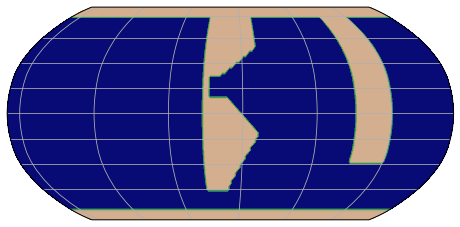

In [111]:
make_case_images(dy_aqua)
make_case_images(dy_straight)
make_case_images(dy_wide)
make_case_images(dy_both)
make_case_images(dy_af)
make_case_images(dy_am)